<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/404_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

In [0]:
# Hyper Parameters
EPOCH = 10
BATCH_SIZE = 64
LR = 0.005         # learning rate
DOWNLOAD_MNIST = True
N_TEST_IMG = 5

In [0]:
# Mnist digits dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,                                     # this is training data
    transform=torchvision.transforms.ToTensor(),    # Converts a PIL.Image or numpy.ndarray to
                                                    # torch.FloatTensor of shape (C x H x W) and normalize in the range [0.0, 1.0]
    download=DOWNLOAD_MNIST,                        # download it if you don't have it
)

torch.Size([60000, 28, 28])
torch.Size([60000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


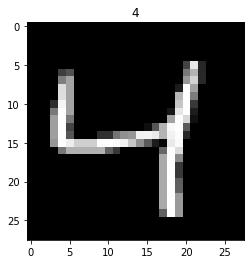

In [16]:
# plot one example
print(train_data.train_data.size())     # (60000, 28, 28)
print(train_data.train_labels.size())   # (60000)
plt.imshow(train_data.train_data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [0]:
train_loader = Data.DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True)

In [0]:
class AutoEncode(nn.Module):
  def __init__(self):
    super(AutoEncode,self).__init__()
    self.encode = nn.Sequential(
        nn.Linear(28*28,128),
        nn.Tanh(),
        nn.Linear(128,64),
        nn.Tanh(),
        nn.Linear(64,12),
        nn.Tanh(),
        nn.Linear(12,3)
    )
    self.decode = nn.Sequential(
        nn.Linear(3,12),
        nn.Tanh(),
        nn.Linear(12,64),
        nn.Tanh(),
        nn.Linear(64,128),
        nn.Tanh(),
        nn.Linear(128,28*28),
        nn.Sigmoid()
    )

  def forward(self,x):
      encode = self.encode(x)
      decode = self.decode(encode)
      return encode,decode

In [0]:
autoencoder = AutoEncode()

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=LR)
loss_func = nn.MSELoss()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


Epoch:  0 | train loss: 0.2315


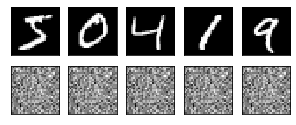

Epoch:  0 | train loss: 0.0651


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0623


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0555


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0535


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0552


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0512


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0482


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0472


<Figure size 432x288 with 0 Axes>

Epoch:  0 | train loss: 0.0441


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0474


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0447


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0441


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0456


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0460


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0457


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0443


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0477


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0448


<Figure size 432x288 with 0 Axes>

Epoch:  1 | train loss: 0.0438


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0491


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0433


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0473


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0442


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0441


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0433


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0435


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0426


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0404


<Figure size 432x288 with 0 Axes>

Epoch:  2 | train loss: 0.0417


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0478


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0376


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0418


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0432


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0425


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0402


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0393


<Figure size 432x288 with 0 Axes>

Epoch:  3 | train loss: 0.0446


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0401


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0391


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0392


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0427


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0451


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0425


<Figure size 432x288 with 0 Axes>

Epoch:  4 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0436


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0402


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0426


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0403


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0412


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0423


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0406


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0428


<Figure size 432x288 with 0 Axes>

Epoch:  5 | train loss: 0.0381


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0381


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0442


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0386


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0430


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0387


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0409


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0427


<Figure size 432x288 with 0 Axes>

Epoch:  6 | train loss: 0.0455


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0357


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0398


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0393


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0371


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0394


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0392


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0361


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0398


<Figure size 432x288 with 0 Axes>

Epoch:  7 | train loss: 0.0391


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0389


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0380


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0393


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0373


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0396


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0421


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0367


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0424


<Figure size 432x288 with 0 Axes>

Epoch:  8 | train loss: 0.0405


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0379


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0420


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0412


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0402


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0407


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0424


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0361


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0388


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0375


<Figure size 432x288 with 0 Axes>

Epoch:  9 | train loss: 0.0350


<Figure size 432x288 with 0 Axes>

In [23]:
# initialize figure
f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
plt.ion()   # continuously plot

# original data (first row) for viewing
view_data = train_data.train_data[:N_TEST_IMG].view(-1, 28*28).type(torch.FloatTensor)/255.
for i in range(N_TEST_IMG):
    a[0][i].imshow(np.reshape(view_data.data.numpy()[i], (28, 28)), cmap='gray'); a[0][i].set_xticks(()); a[0][i].set_yticks(())



for epoch in range(EPOCH):
  for step,(x,b_labels) in enumerate(train_loader):
    b_x = x.view(-1,28*28)
    b_y = x.view(-1,28*28)

    encode,decode = autoencoder(b_x)
    loss = loss_func(decode,b_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if step % 100 == 0:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            for i in range(N_TEST_IMG):
                a[1][i].clear()
                a[1][i].imshow(np.reshape(decoded_data.data.numpy()[i], (28, 28)), cmap='gray')
                a[1][i].set_xticks(()); a[1][i].set_yticks(())
            plt.draw(); plt.pause(0.05)

plt.ioff()
plt.show()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


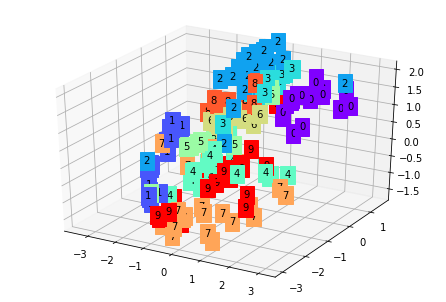

In [24]:
# visualize in 3D plot
view_data = train_data.train_data[:200].view(-1, 28*28).type(torch.FloatTensor)/255.
encoded_data, _ = autoencoder(view_data)
fig = plt.figure(2); ax = Axes3D(fig)
X, Y, Z = encoded_data.data[:, 0].numpy(), encoded_data.data[:, 1].numpy(), encoded_data.data[:, 2].numpy()
values = train_data.train_labels[:200].numpy()
for x, y, z, s in zip(X, Y, Z, values):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()